In [63]:
import requests
import io
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from os import listdir
from os.path import isfile, join

In [2]:
def get_keys(path):
    with open(path) as f:
        return f.readlines()[0]

In [3]:
def get_historical_stock_price(ticker, interval = None, startDate = None, endDate = None):
    url = 'https://api.unibit.ai/v2/stock/historical?'

    ticker_dict = {
        'tickers' : ticker,
        'interval' : interval,
        'startDate' : startDate,
        'endDate' : endDate,
        'selectedFields' : None,
        'dataType':'json',
        'accessKey': get_keys('C:\\Users\\TJ Bray\.secret\\unibit.txt')
    }
    
    response = requests.get(url, params = ticker_dict)
    data = response.json()['result_data'][ticker]
    df = pd.json_normalize(data)
    
    return df

In [4]:
#NKE = get_historical_stock_price('NKE', startDate = '2021-1-1', endDate = '2022-1-7')
#NKE.to_csv('nike.csv')

In [5]:
#nike = pd.read_csv('nike.csv', index_col = 0)
#nike.date = pd.to_datetime(nike.date)
#nike.set_index('date', inplace = True)
#nike.sort_index(inplace = True)

In [6]:
#files = [f for f in listdir('.\S&P500_data')]

In [7]:
#companies = []
#for i in files:
    company = i.split('.')[0]
    companies.append(company)

In [8]:
#test_companies = np.random.choice(companies, 5)

In [103]:
#x = test_companies[0]
x = 'AMZN'

In [104]:
csv_for_df = f'S&P500_data/{x}.csv'
df = pd.read_csv(csv_for_df)
df.columns = [i.lower().replace(' ',"") for i in df.columns]

In [105]:
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace = True)
df.sort_index(inplace = True)

In [106]:
df

,low,open,volume,high,close,adjustedclose
date,,,,,,
1997-01-07,1.510417,1.541667,1292400,1.541667,1.515625,1.515625
1997-01-08,2.250000,2.343750,3588000,2.416667,2.416667,2.416667
1997-01-10,3.937500,4.437500,4999200,4.500000,4.020833,4.020833
1997-01-12,4.135417,4.239583,2383200,4.375000,4.270833,4.270833
1997-02-06,1.500000,1.510417,591600,1.531250,1.510417,1.510417
...,...,...,...,...,...,...
2021-12-14,3328.800049,3351.000000,2798800,3389.979980,3381.830078,3381.830078
2021-12-15,3303.899902,3371.959961,3789700,3472.000000,3466.300049,3466.300049
2021-12-16,3363.209961,3467.370117,3043800,3483.320068,3377.419922,3377.419922


In [107]:
df['rsi'] = ta.rsi(df.close)

In [108]:
def add_bbands(df):
    bbands = ta.bbands(df.close)
    df = df.join(bbands)
    return df

bbands_df = add_bbands(df)

In [109]:
bbands_df.head()

,low,open,volume,high,close,adjustedclose,rsi,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
date,,,,,,,,,,,,
1997-01-07,1.510417,1.541667,1292400,1.541667,1.515625,1.515625,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-08,2.250000,2.343750,3588000,2.416667,2.416667,2.416667,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-10,3.937500,4.437500,4999200,4.500000,4.020833,4.020833,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-12,4.135417,4.239583,2383200,4.375000,4.270833,4.270833,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-06,1.500000,1.510417,591600,1.531250,1.510417,1.510417,NaN,0.363724,2.746875,5.130026,173.517233,0.240583


In [110]:
def add_sma(df):
    
    sma_days = [7,22,252]
    
    for i in sma_days:
        name = f'sma_{i}'
        df[name] = ta.sma(df['close'],i)
        
    return df

In [111]:
sma_df = add_sma(bbands_df)

In [112]:
sma_df.head()

,low,open,volume,high,close,adjustedclose,rsi,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,sma_7,sma_22,sma_252
date,,,,,,,,,,,,,,,
1997-01-07,1.510417,1.541667,1292400,1.541667,1.515625,1.515625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-08,2.250000,2.343750,3588000,2.416667,2.416667,2.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-10,3.937500,4.437500,4999200,4.500000,4.020833,4.020833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-12,4.135417,4.239583,2383200,4.375000,4.270833,4.270833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-06,1.500000,1.510417,591600,1.531250,1.510417,1.510417,NaN,0.363724,2.746875,5.130026,173.517233,0.240583,NaN,NaN,NaN


In [143]:
def add_ema(df):

    ema_days = [7,22,252]

    for i in ema_days:
        name = f'ema_{i}'
        df[name] = ta.ema(df['close'],i)
        ax.plot(df[name])
        
    for i in ema_days:
        zone_name = f'ema_{i}_zone'
        df[zone_name] = ta.ema(df.high,i) - ta.ema(df.low,i)
        
    return df

No handles with labels found to put in legend.


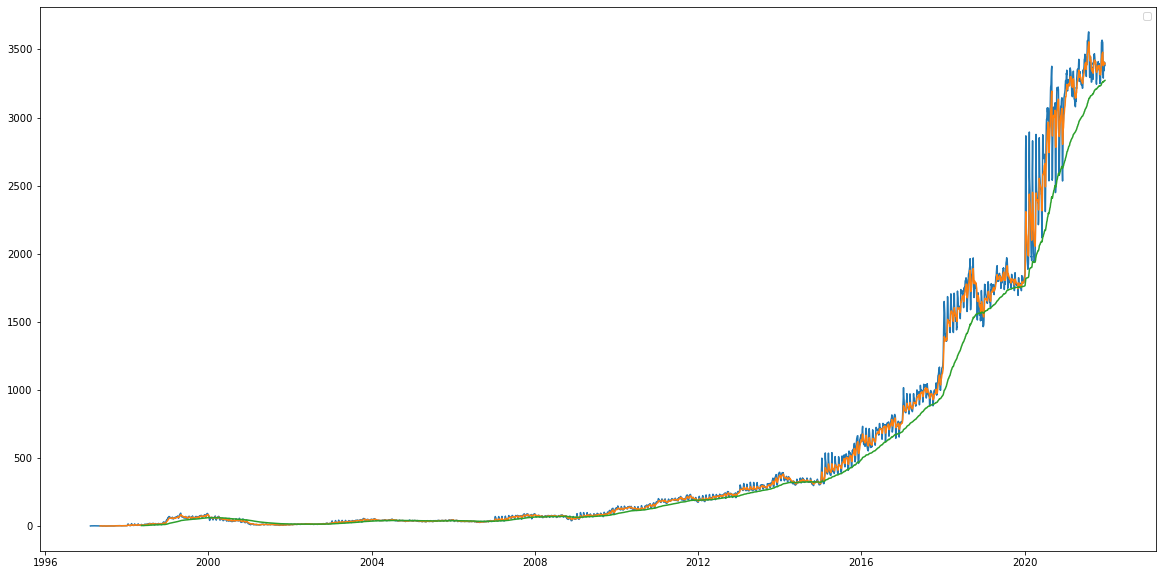

In [144]:
ema_df = add_ema(sma_df)

In [117]:
ema_df.head()

,low,open,volume,high,close,adjustedclose,rsi,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,...,BBP_5_2.0,sma_7,sma_22,sma_252,ema_7,ema_22,ema_252,ema_7_zone,ema_22_zone,ema_252_zone
date,,,,,,,,,,,,,,,,,,,,,
1997-01-07,1.510417,1.541667,1292400,1.541667,1.515625,1.515625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-08,2.250000,2.343750,3588000,2.416667,2.416667,2.416667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-10,3.937500,4.437500,4999200,4.500000,4.020833,4.020833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-12,4.135417,4.239583,2383200,4.375000,4.270833,4.270833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-06,1.500000,1.510417,591600,1.531250,1.510417,1.510417,NaN,0.363724,2.746875,5.130026,...,0.240583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df = ema_df.dropna()

In [119]:
def decomposition_plot(ts):
        '''Takes time series dataframe and decompose it in order to observe trend, seasonality, and residuals'''
        decomposition = seasonal_decompose(ts, period = 7, model = 'multiplicative')
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        plt.figure(figsize=(10,7))
        plt.subplot(511)
        plt.plot(ts, label='Observed', color='red')
        plt.legend(loc='best')
        plt.subplot(512)
        plt.plot(trend, label='Trend', color='blue')
        plt.legend(loc='best')
        plt.subplot(513)
        plt.plot(seasonal,label='Seasonality', color='orange')
        plt.legend(loc='best')
        plt.subplot(514)
        plt.plot(residual, label='Residuals', color='black')
        plt.legend(loc='best')
        plt.tight_layout()
        
        return decomposition

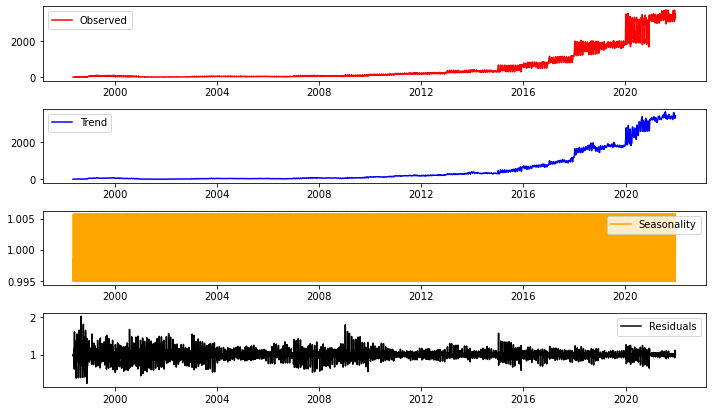

In [130]:
amzn_decomp = decomposition_plot(df['close'])

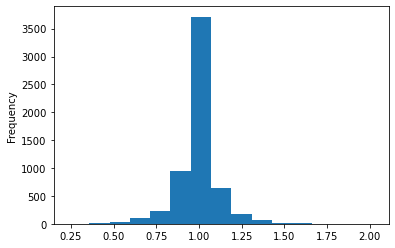

In [138]:
amzn_decomp.resid.plot(kind = 'hist', bins = 15);